# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities? 
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
df = pd.read_csv('./data/cars_hw.csv')
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [104]:
df.describe()

,Unnamed: 0,Make_Year,Mileage_Run,Seating_Capacity,Price
count,976.000000,976.000000,976.000000,976.000000,9.760000e+02
mean,488.500000,2016.963115,41571.195697,5.095287,7.410195e+05
std,281.891232,2.818742,24390.995134,0.446224,3.673234e+05
min,1.000000,2011.000000,1117.000000,4.000000,1.880000e+05
25%,244.750000,2015.000000,22676.750000,5.000000,4.757500e+05
50%,488.500000,2017.000000,37570.500000,5.000000,6.665000e+05
75%,732.250000,2019.000000,57421.250000,5.000000,8.830000e+05
max,976.000000,2022.000000,99495.000000,8.000000,2.941000e+06


In [105]:
# checked unique vals and removed all letters so we can cast as float
df['No_of_Owners'] = df['No_of_Owners'].str.replace('s','')
df['No_of_Owners'] = df['No_of_Owners'].str.replace('t','')
df['No_of_Owners'] = df['No_of_Owners'].str.replace('n','')
df['No_of_Owners'] = df['No_of_Owners'].str.replace('r','')
df['No_of_Owners'] = df['No_of_Owners'].str.replace('d','')

In [106]:
# cast as float
df['No_of_Owners'] = df['No_of_Owners'].astype(float)

In [107]:
# confirm it looks right now
df['No_of_Owners'].describe()

count    976.000000
mean       1.165984
std        0.383119
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: No_of_Owners, dtype: float64

All other columns are well cleaned.

Text(0.5, 1.0, 'Mileage vs. Pricing')

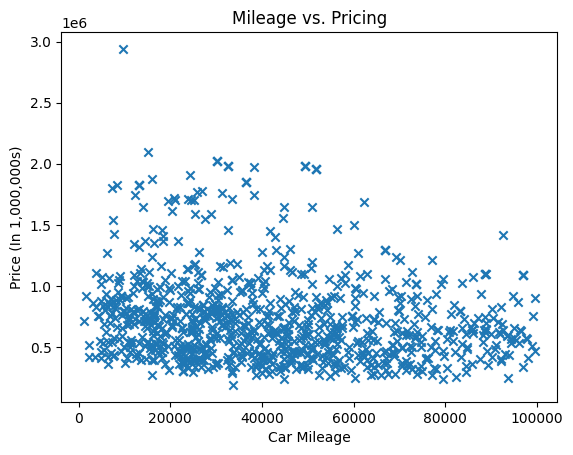

In [108]:
plt.scatter(df['Mileage_Run'], df['Price'], marker='x')

# labeling
plt.xlabel('Car Mileage')
plt.ylabel('Price (In 1,000,000s)')
plt.title('Mileage vs. Pricing')

Not as obvious of a negative trend as I anticipated.

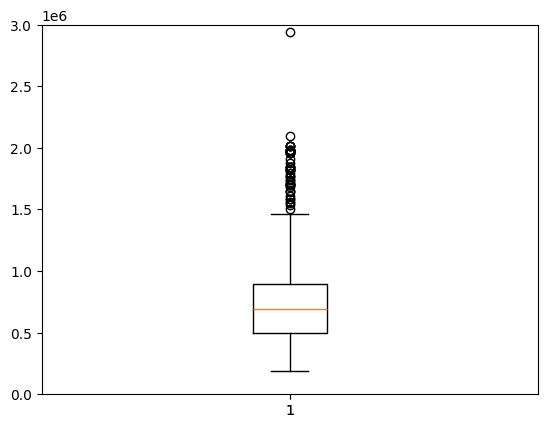

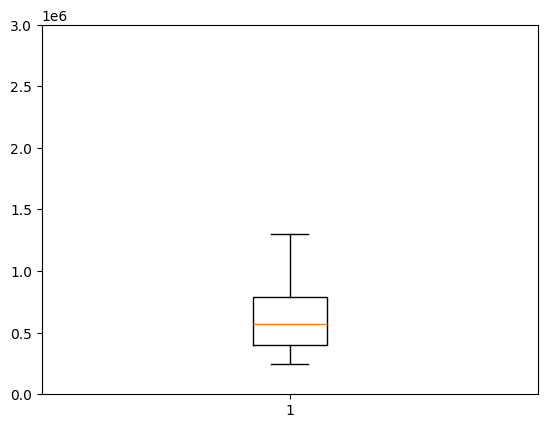

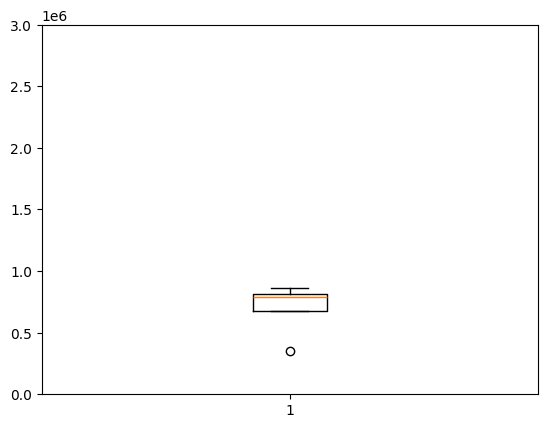

In [109]:
for i in range(4):
    plt.boxplot(df.loc[df['No_of_Owners']==i, 'Price'])
    if(i != 0):
        plt.ylim(0,3000000)
        plt.show()

Care with 1 owner have prices extending much higher than multiple owners, but middle values are all in similar ranges.

Text(0, 0.5, 'Count')

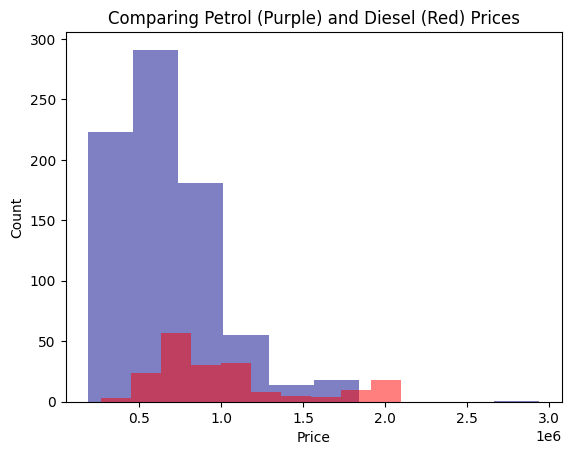

In [110]:
plt.hist(df.loc[df['Fuel_Type']=='petrol', 'Price'], alpha = 0.5, color = 'darkblue')
plt.hist(df.loc[df['Fuel_Type']=='diesel', 'Price'], alpha = 0.5, color = 'red')

plt.title('Comparing Petrol (Purple) and Diesel (Red) Prices')
plt.xlabel('Price')
plt.ylabel('Count')

Petrol and Diesel have similar shapes but Diesel has another small peak at higher prices.

In [111]:
df['Transmission'].unique()

array(['7-Speed', '5-Speed', '6-Speed', 'CVT', '4-Speed'], dtype=object)

Text(0, 0.5, 'Count')

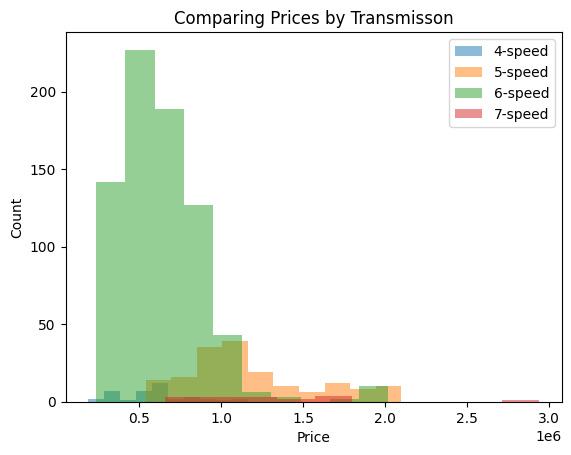

In [112]:
plt.hist(df.loc[df['Transmission']=='4-Speed', 'Price'], alpha = 0.5, label='4-speed')
plt.hist(df.loc[df['Transmission']=='6-Speed', 'Price'], alpha = 0.5, label='5-speed')
plt.hist(df.loc[df['Transmission']=='5-Speed', 'Price'], alpha = 0.5, label='6-speed')
plt.hist(df.loc[df['Transmission']=='7-Speed', 'Price'], alpha = 0.5, label='7-speed')

plt.legend()
plt.title('Comparing Prices by Transmisson')
plt.xlabel('Price')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

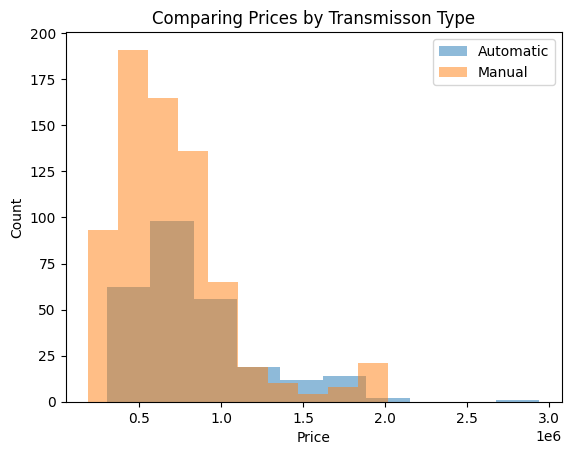

In [113]:
plt.hist(df.loc[df['Transmission_Type']=='Automatic', 'Price'], alpha = 0.5, label='Automatic')
plt.hist(df.loc[df['Transmission_Type']=='Manual', 'Price'], alpha = 0.5, label='Manual')

plt.legend()
plt.title('Comparing Prices by Transmisson Type')
plt.xlabel('Price')
plt.ylabel('Count')

Pretty similar shapes with automatic have a slightly higher price at peak.

In [114]:
df.groupby('Color')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Color,,,,,,,,
beige,9.0,5.500000e+05,174790.588992,338000.0,466000.0,505000.0,557000.0,858000.0
black,35.0,1.023514e+06,623392.161127,245000.0,481000.0,926000.0,1477000.0,2941000.0
blue,128.0,7.207500e+05,243280.661613,188000.0,554750.0,721000.0,844250.0,1559000.0
bronze,12.0,5.585000e+05,225509.725652,287000.0,408500.0,480000.0,666750.0,1019000.0
brown,70.0,8.026714e+05,227042.083913,338000.0,654250.0,790000.0,914000.0,1411000.0
golden,3.0,6.213333e+05,225763.888462,362000.0,545000.0,728000.0,751000.0,774000.0
green,2.0,3.125000e+05,31819.805153,290000.0,301250.0,312500.0,323750.0,335000.0
grey,164.0,6.446829e+05,260689.429403,269000.0,453000.0,588000.0,787750.0,2100000.0
maroon,3.0,8.783333e+05,731936.017240,328000.0,463000.0,598000.0,1153500.0,1709000.0


Nothing convincing about color being relevant to price, won't include in model. Especially with small samples, including it could result in an inaccurate model that skews too much based on color.

In [115]:
categorical_vars = ['Make', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']

df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [117]:
X = df_encoded.drop(columns='Price')
y = df_encoded['Price']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate RMSE and R²
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print(f"Train RMSE: {rmse_train:.2f}, R²: {r2_train:.3f}")
print(f"Test RMSE: {rmse_test:.2f}, R²: {r2_test:.3f}")


ValueError: could not convert string to float: 'grey'

Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=1) 
lasso.fit(X_train, y_train)

y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

print('Lasso Train R²:', r2_score(y_train, y_train_pred_lasso))
print('Lasso Test R²:', r2_score(y_test, y_test_pred_lasso))


Lasso Train R²: 0.8527079964018455
Lasso Test R²: 0.8160595997796491


shows almost exact same vals which tells me there are not too many irrelevant variables in the dataset so I will stick with the first model.

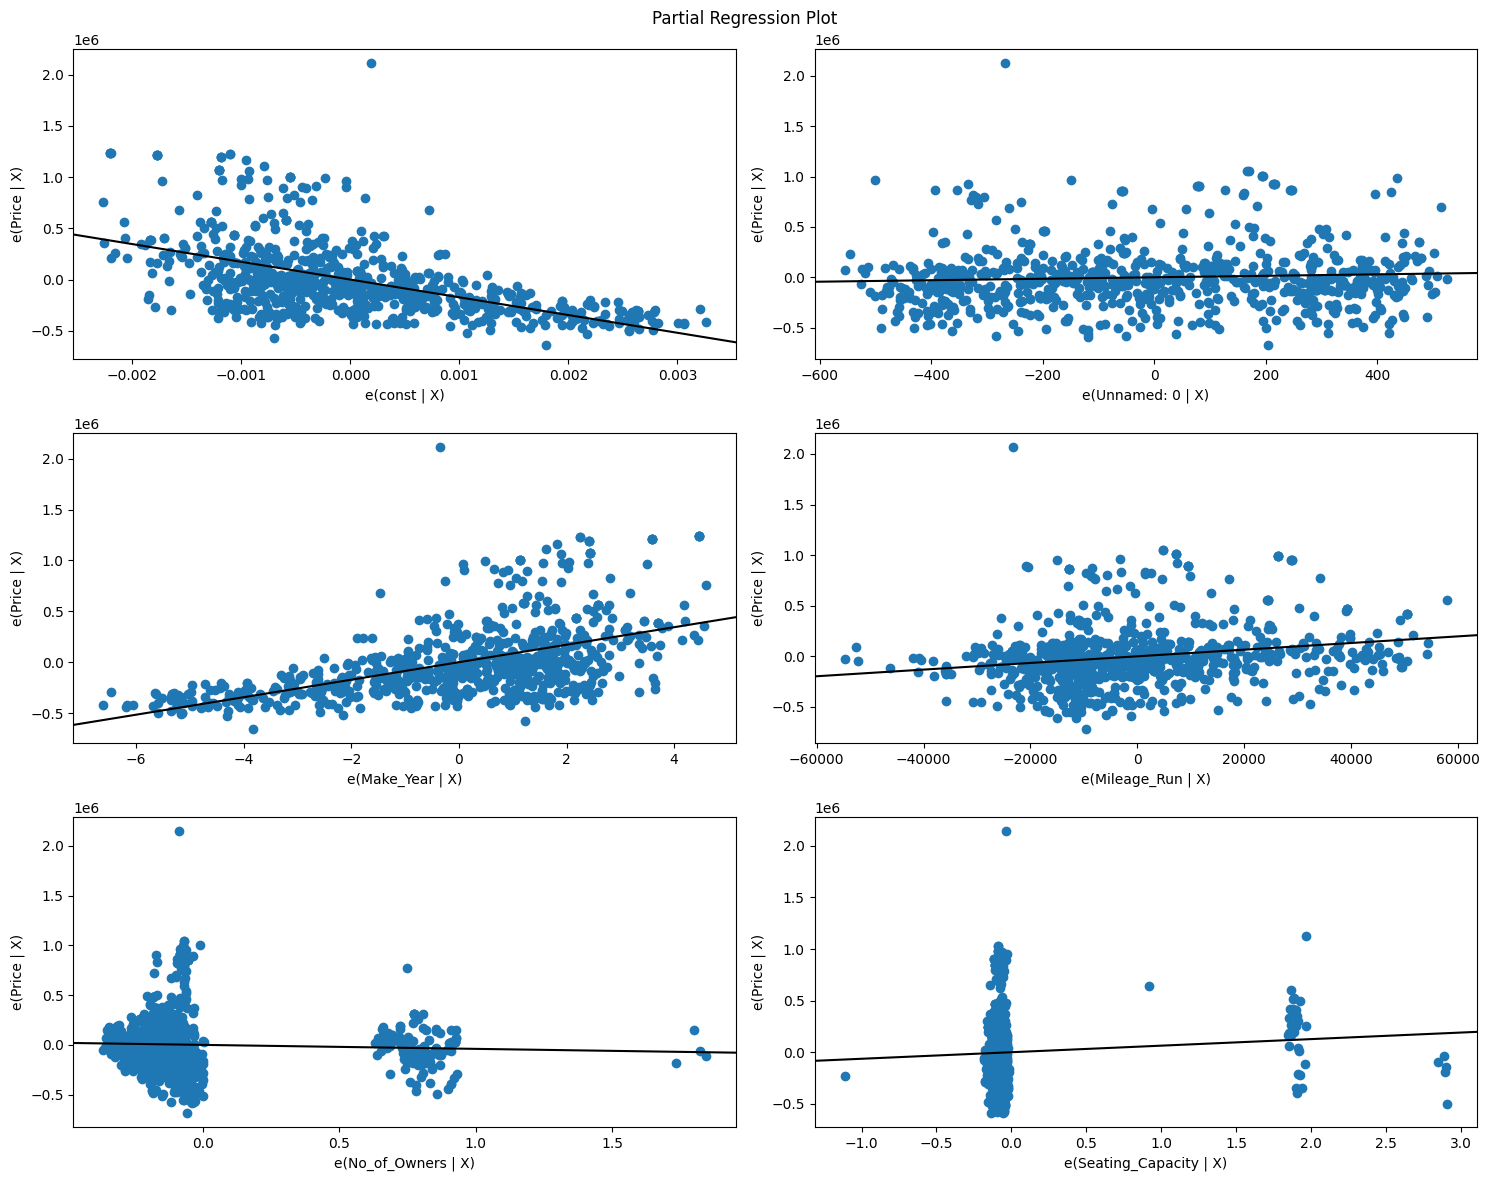

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Select only numeric columns
X_train_num = X_train.select_dtypes(include=['number'])

# Add constant
X_const = sm.add_constant(X_train_num)

# Fit the model
ols_model = sm.OLS(y_train, X_const).fit()

# Plot partial regression plots
fig = plt.figure(figsize=(15, 12))
sm.graphics.plot_partregress_grid(ols_model, fig=fig)
plt.tight_layout()
plt.show()


In [ ]:
# Create the interaction term: Mileage × Make Year in training set
X_train_interaction = X_train_num.copy()
X_train_interaction['Mileage_Year_Interaction'] = X_train_interaction['Mileage_Run'] * X_train_interaction['Make_Year']

# Add constant term (intercept) to the training set features
X_train_interaction_const = sm.add_constant(X_train_interaction)

# Fit the OLS model with the interaction term
ols_model_with_interaction = sm.OLS(y_train, X_train_interaction_const).fit()

# Create the interaction term: Mileage × Make Year in test set
X_test_interaction = X_test.copy()  # Make a copy of the test set
X_test_interaction['Mileage_Year_Interaction'] = X_test_interaction['Mileage_Run'] * X_test_interaction['Make_Year']

# Add constant term (intercept) to the test set features
X_test_interaction_const = sm.add_constant(X_test_interaction)

# Ensure both training and test sets have the same columns (features)
# Make sure the test set has the same columns as the training set by reindexing
X_test_interaction_const = X_test_interaction_const[X_train_interaction_const.columns]

# Predict on both train and test sets
y_train_interaction_pred = ols_model_with_interaction.predict(X_train_interaction_const)
y_test_interaction_pred = ols_model_with_interaction.predict(X_test_interaction_const)

# Calculate RMSE and R² for the interaction model
rmse_train_interaction = np.sqrt(mean_squared_error(y_train, y_train_interaction_pred))
rmse_test_interaction = np.sqrt(mean_squared_error(y_test, y_test_interaction_pred))
r2_train_interaction = r2_score(y_train, y_train_interaction_pred)
r2_test_interaction = r2_score(y_test, y_test_interaction_pred)

# Print the results for the interaction model
print(f"Interaction Model - Train RMSE: {rmse_train_interaction:.2f}, R²: {r2_train_interaction:.3f}")
print(f"Interaction Model - Test RMSE: {rmse_test_interaction:.2f}, R²: {r2_test_interaction:.3f}")


Interaction Model - Train RMSE: 306527.01, R²: 0.327
Interaction Model - Test RMSE: 284587.37, R²: 0.294


Adding the interaction term in this way made the model signifigantly worse. This relationship / correlation between these variables may not be as simple as I assumed, so I will leave the interaction variable out of the model.

**Part 7**

I think my primary takeaway from this is how difficult it can be to improve upon a simple model. I assumed things would stand out and improvements would be quick and easy, but especially with adding the interaction term, this proved to not be the case. I want to keep going more in depth with things like interaction terms and multicollinearity to get a better idea of how to resolve issues like this in linear models.